In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import datetime

In [14]:
df = pd.read_csv('Data/minuto.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587257 entries, 0 to 1587256
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   rowID               1587257 non-null  int64  
 1   hpwren_timestamp    1587257 non-null  object 
 2   air_pressure        1587257 non-null  float64
 3   air_temp            1587257 non-null  float64
 4   avg_wind_direction  1586824 non-null  float64
 5   avg_wind_speed      1586824 non-null  float64
 6   max_wind_direction  1586824 non-null  float64
 7   max_wind_speed      1586824 non-null  float64
 8   min_wind_direction  1586824 non-null  float64
 9   min_wind_speed      1586824 non-null  float64
 10  rain_accumulation   1587256 non-null  float64
 11  rain_duration       1587256 non-null  float64
 12  relative_humidity   1587257 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 157.4+ MB


In [16]:
df.shape

(1587257, 13)

In [17]:
df.isnull().sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

In [18]:
# Separar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=['float64' , 'int64']).columns

# Reimputar valores nulos para asegurarnos de que todo se procesa correctamente
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Verificar nuevamente valores nulos
print("Valores nulos restantes después de la imputación:")
print(df.isnull().sum().sum())  # Esto debería ser 0

Valores nulos restantes después de la imputación:
0


In [19]:
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0.0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,0.0,0.0,60.5
1,1.0,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2.0,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3.0,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4.0,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,1587257.0,793628.000000,458201.772449,0.00,396814.0,793628.00,1190442.00,1587256.00
air_pressure,1587257.0,916.830127,3.051593,905.00,914.8,916.70,918.70,929.50
air_temp,1587257.0,61.851440,11.833624,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,1587257.0,161.970845,95.195707,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,1587257.0,2.774115,2.060499,0.00,1.3,2.20,3.80,32.30
max_wind_direction,1587257.0,163.409485,92.355457,0.00,68.0,187.00,223.00,359.00
max_wind_speed,1587257.0,3.399622,2.422864,0.10,1.6,2.70,4.60,36.00
min_wind_direction,1587257.0,166.829965,97.449694,0.00,77.0,180.00,212.00,359.00
min_wind_speed,1587257.0,2.132985,1.745129,0.00,0.8,1.60,3.00,32.00
rain_accumulation,1587257.0,0.001855,0.960971,0.00,0.0,0.00,0.00,655.01


In [22]:
sampled_df = df [ ( df ['rowID'] %10 ) == 0]
sampled_df.shape

(158726, 13)

In [24]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937510,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158726.0,162.161851,95.264993,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158726.0,2.775048,2.057349,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158726.0,163.468965,92.439609,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158726.0,3.400355,2.418480,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158726.0,166.777850,97.427249,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158726.0,2.134509,1.741884,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158726.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [25]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157813, 13)

In [26]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157238, 13)

In [27]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [28]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [29]:
features = [
    'air_pressure', 'air_temp','avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed','relative_humidity'
]

In [30]:
select_df = sampled_df[features]

In [34]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48446804,  0.24577707, -0.68400841, ..., -0.62169396,
        -0.74441798,  0.49173609],
       [-1.48446804,  0.0328229 , -0.1906462 , ...,  0.03819841,
        -0.66172117, -0.34749968],
       [-1.51723658,  0.12408897, -0.65251721, ..., -0.44860744,
        -0.37228232,  0.40781252],
       ...,
       [-0.30480037,  1.15843781,  1.9087675 , ...,  2.03951131,
        -0.70306958,  0.01489759],
       [-0.30480037,  1.12801579,  2.06622353, ..., -1.671031  ,
        -0.74441798, -0.04995245],
       [-0.30480037,  1.09759376, -1.63924165, ..., -1.55203401,
        -0.62037276, -0.05758186]], shape=(158726, 7))

In [36]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
model

KMeans(n_clusters=12)

In [37]:
centers = model.cluster_centers_
centers

array([[ 1.32016803, -0.07327806, -1.1132542 , -0.4611459 , -0.95280236,
        -0.45904417, -0.91028295],
       [ 0.2871087 ,  0.7877992 ,  1.32749274, -0.63220308,  1.5908731 ,
        -0.5829363 , -0.75086763],
       [-0.1798519 ,  0.6133434 ,  0.40990144,  0.66568577,  0.51915219,
         0.60753093, -0.17678217],
       [-1.14641553, -0.8868201 ,  0.44347056,  1.91156702,  0.53681396,
         1.87237265,  0.92669113],
       [-0.88494588, -1.14246809,  0.37108948,  0.21294456,  0.47324145,
         0.20254727,  1.34482214],
       [ 1.19677098, -0.34849514, -1.15642595,  2.72324269, -1.06104117,
         2.84921149, -1.14505673],
       [-0.24087491,  0.89102594, -1.308224  , -0.57518311, -1.16885155,
        -0.59167763, -0.60697449],
       [ 0.23468095,  0.32332102,  1.88821325, -0.65216163, -1.55128772,
        -0.57695381, -0.28661901],
       [-0.25050783,  0.60998104,  0.2028601 , -0.62603633,  0.37635508,
        -0.64011997, -0.38728697],
       [ 0.0041149 , -0.7840

In [40]:
def pd_centers(featuresUsed , centers):
    colNames = list(featuresUsed)
    colNames.append('predictions')

    Z = [np.append(A , index) for index , A in enumerate(centers)]

    P = pd.DataFrame(Z , columns=colNames)
    P['predictions'] = P['predictions'].astype(int)
    return P

In [49]:
def parallel_plt(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', 'm', 'c']), None, len(data)))
    plt.figure(figsize=(15, 8))
    ax = plt.gca()
    ax.set_ylim([-3, +3])
    ax.set_facecolor("#f4f4f4")  # Fondo gris claro
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title("Parallel Coordinates Plot", fontsize=14, fontweight='bold')
    parallel_coordinates(data, 'predictions', color=my_colors, marker='*', alpha=0.8)
    plt.xlabel("Features", fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.show()


In [43]:
P = pd_centers(features,centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,predictions
0,1.320168,-0.073278,-1.113254,-0.461146,-0.952802,-0.459044,-0.910283,0
1,0.287109,0.787799,1.327493,-0.632203,1.590873,-0.582936,-0.750868,1
2,-0.179852,0.613343,0.409901,0.665686,0.519152,0.607531,-0.176782,2
3,-1.146416,-0.886820,0.443471,1.911567,0.536814,1.872373,0.926691,3
4,-0.884946,-1.142468,0.371089,0.212945,0.473241,0.202547,1.344822,4
5,1.196771,-0.348495,-1.156426,2.723243,-1.061041,2.849211,-1.145057,5
6,-0.240875,0.891026,-1.308224,-0.575183,-1.168852,-0.591678,-0.606974,6
7,0.234681,0.323321,1.888213,-0.652162,-1.551288,-0.576954,-0.286619,7
8,-0.250508,0.609981,0.202860,-0.626036,0.376355,-0.640120,-0.387287,8
9,0.004115,-0.784086,-1.182794,-0.570479,-1.029505,-0.585341,0.916518,9


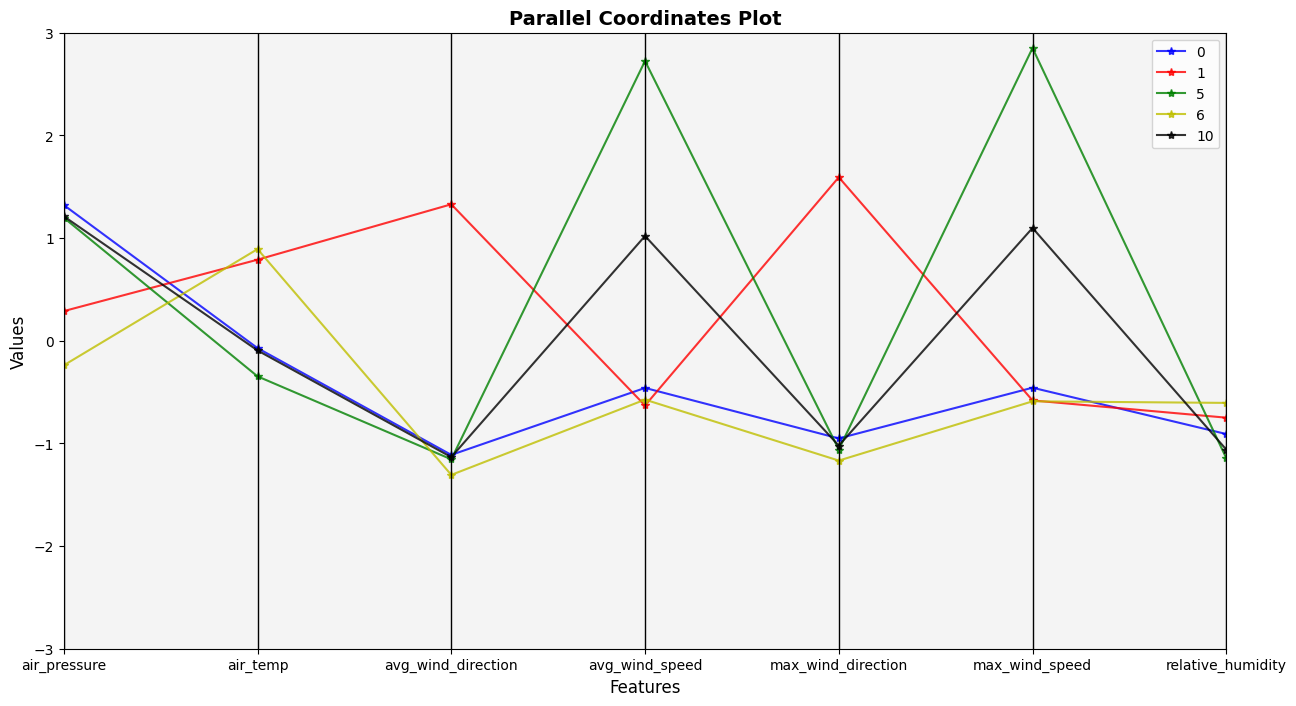

In [50]:
parallel_plt(P[P['relative_humidity']<-0.5])

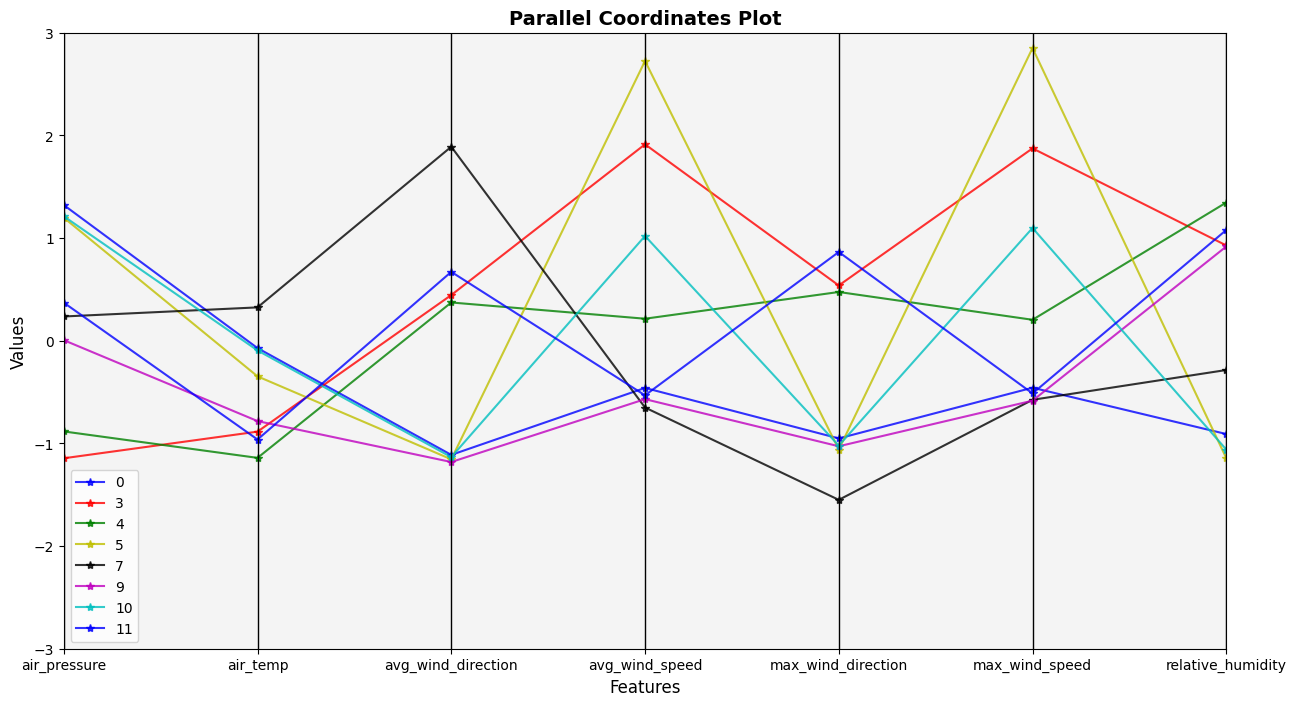

In [51]:
parallel_plt(P[P['air_temp']<0.5])

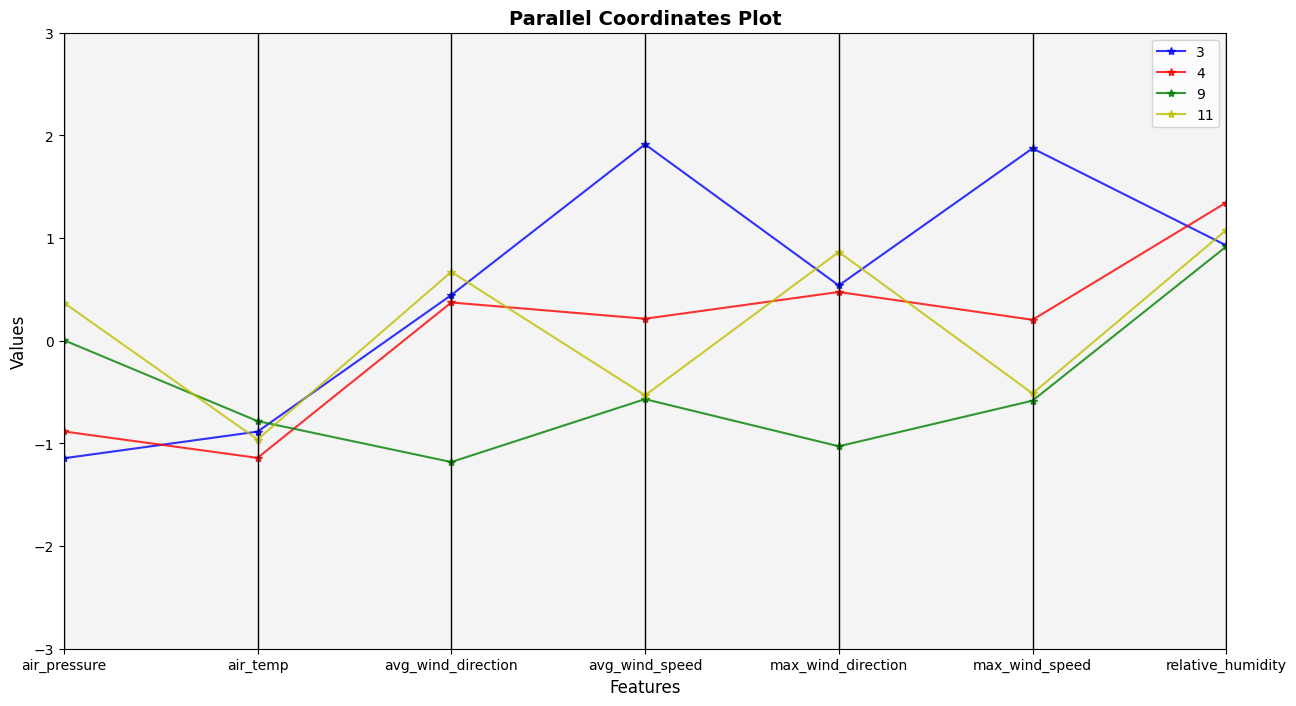

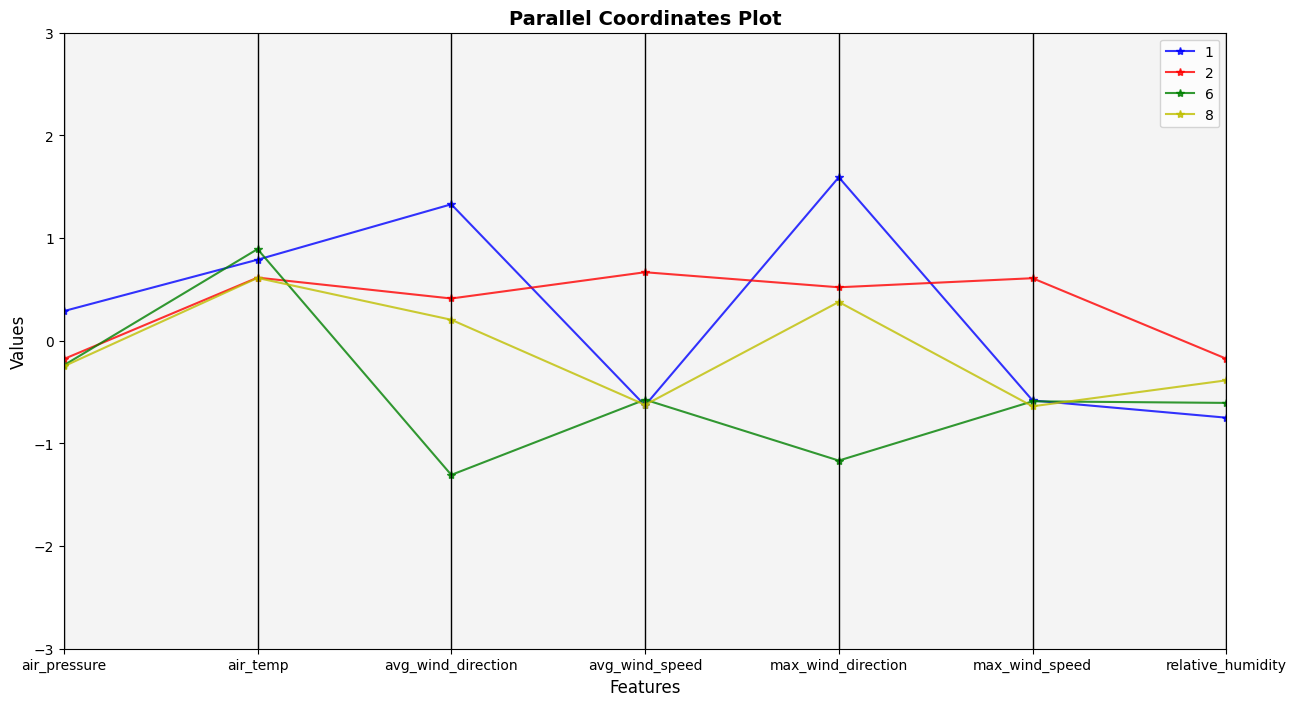

TypeError: unsupported operand type(s) for &: 'NoneType' and 'NoneType'

In [52]:
parallel_plt(P[P['relative_humidity'] > 0.5]) & parallel_plt(P[P['air_temp'] > 0.5])